<a href="https://colab.research.google.com/github/raktimpal/Deep-Learning-Jupyter-Notebooks/blob/master/pal_raktim_cldnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Raktim Pal
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [0]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 2s 0us/step


#Part 1: Plotting cross entropy

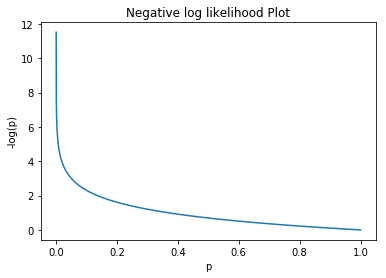

In [0]:
#Show cross-entropy loss function

x = np.arange(0.00001, 1, 0.0001)
y = -np.log(x)
plt.plot(x,y)
plt.xlabel('p')
plt.ylabel('-log(p)')
plt.title('Negative log likelihood Plot')
plt.show()

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: Negative log-likelihood of p is large when p is small.
       Negative log-likelihood of p is small when p is large. 

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: The goal of a loss function is to give us feedback on how well we are doing. 
For a binary classification problem, let us assume that the output is the probability that the input image is that of a cat. When the output is close to 1, it means the probality that it is a cat is high. If it is close to 0 then it is not a cat. When the actual label is 1 i.e. the image is actually a cat, then if my network outputs a value close to zero, then the loss function should be large. The loss function is telling me that I did a bad job.
The ability of the negative log-likelihood to penalise a bad prediction makes it a good objective function when the output can be interpreted as a probability space.




#Part 2: Overfit CNN

In [0]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256,
                     (3,3),
                     activation ='relu',
                     input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation = 'softmax'))
    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss = 'categorical_crossentropy',
                    optimizer = 'RMSprop',
                    metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train,
                                    validation_data = (data_test,labels_test),
                                    epochs = 200,
                                    batch_size = 1024,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test,labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

W0919 00:05:33.004739 139788899334016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 00:05:33.051470 139788899334016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 00:05:33.058296 139788899334016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 00:05:33.088309 139788899334016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 00:05:33.117954 139788899334016 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 21s 344us/step - loss: 1.0107 - acc: 0.6262 - val_loss: 0.6036 - val_acc: 0.7639
Epoch 2/200
60000/60000 [==============================] - 11s 184us/step - loss: 0.5539 - acc: 0.7896 - val_loss: 0.5405 - val_acc: 0.7910
Epoch 3/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.4455 - acc: 0.8340 - val_loss: 0.5975 - val_acc: 0.7972
Epoch 4/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.3925 - acc: 0.8555 - val_loss: 0.3890 - val_acc: 0.8604
Epoch 5/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.3511 - acc: 0.8690 - val_loss: 0.3518 - val_acc: 0.8720
Epoch 6/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.3211 - acc: 0.8816 - val_loss: 0.3397 - val_acc: 0.8746
Epoch 7/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.2965 - acc: 0.8899 - val_l

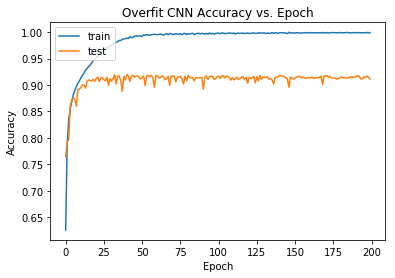

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['acc'])
plt.plot(CNN_overfit_mdata.history['val_acc'])
plt.title('Overfit CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

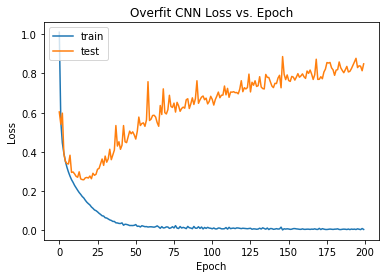

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['loss'])
plt.plot(CNN_overfit_mdata.history['val_loss'])
plt.title('Overfit CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.0037

2.   What does the loss of the testing set go to? 

  ANS: 0.8492
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The model overfits to the training set. Hence, the training set loss is low but the test set loss is high.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: This is clear indication of overfitting. The network has enough capacity to perfectly fit the training data and it is evident from 99.9% training accuracy that the network has perfectly fit the training data. So, the network is unable to generalize well to the test set, and that is why the test set accuracy is low.

Two possible solutions are: 

(1) Use Dropout in the hidden layers 

(2) Add noise to the input images


#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()
    
    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,
                     (3,3),
                     activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation = 'softmax'))    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss = 'categorical_crossentropy',
                    optimizer = 'RMSprop',
                    metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_in_mdata = CNN_dropout_in.fit(data_train, labels_train,
                                    validation_data = (data_test,labels_test),
                                    epochs = 200,
                                    batch_size = 1024,
                                    shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_in.evaluate(data_test,labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

W0919 00:42:56.596565 139788899334016 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 194us/step - loss: 1.0915 - acc: 0.5902 - val_loss: 0.7902 - val_acc: 0.6855
Epoch 2/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.6322 - acc: 0.7564 - val_loss: 0.6258 - val_acc: 0.7753
Epoch 3/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.5353 - acc: 0.7960 - val_loss: 0.5429 - val_acc: 0.7995
Epoch 4/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4788 - acc: 0.8192 - val_loss: 0.4983 - val_acc: 0.8273
Epoch 5/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4390 - acc: 0.8338 - val_loss: 0.4787 - val_acc: 0.8166
Epoch 6/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.4104 - acc: 0.8434 - val_loss: 0.4608 - val_acc: 0.8236
Epoch 7/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.3862 - acc: 0.8545 - val_l

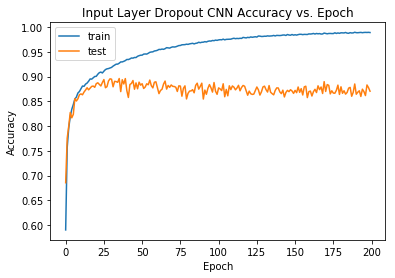

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_in_mdata.history['acc'])
plt.plot(CNN_dropout_in_mdata.history['val_acc'])
plt.title('Input Layer Dropout CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

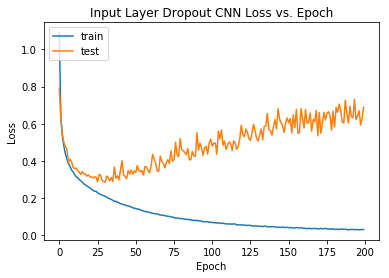

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_in_mdata.history['loss'])
plt.plot(CNN_dropout_in_mdata.history['val_loss'])
plt.title('Input Layer Dropout CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.0316
  
2.   What does the loss of the testing set go to? 

  ANS: 0.6887

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Dropout on input layer is not helping the model generalize better. Dropout on input layer means random pixels from the images are dropped. It is not enough. The real complexity of the network lies in its hidden layers. And the hidden layers are still untouched because no dropout has been added to them. Hence, the model is still very complex.

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    model.add(Conv2D(256,
                     (3,3),
                     activation ='relu',
                     input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation ='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation = 'softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss = 'categorical_crossentropy',
                           optimizer = 'RMSprop',
                           metrics =['accuracy'])


#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mdata = CNN_dropout_hidden.fit(data_train, labels_train,
                                                  validation_data = (data_test,labels_test),
                                                  epochs = 200,
                                                  batch_size = 1024,
                                                  shuffle=True)


#Print accuracy of model on testing set after training 
scores = CNN_dropout_hidden.evaluate(data_test,labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 332us/step - loss: 1.0908 - acc: 0.5985 - val_loss: 0.7606 - val_acc: 0.7699
Epoch 2/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.5876 - acc: 0.7758 - val_loss: 0.5997 - val_acc: 0.8028
Epoch 3/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.4745 - acc: 0.8197 - val_loss: 0.5302 - val_acc: 0.8250
Epoch 4/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.4146 - acc: 0.8451 - val_loss: 0.4430 - val_acc: 0.8621
Epoch 5/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.3662 - acc: 0.8639 - val_loss: 0.4326 - val_acc: 0.8677
Epoch 6/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.3363 - acc: 0.8744 - val_loss: 0.4350 - val_acc: 0.8652
Epoch 7/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.3120 - acc: 0.8836 - val_l

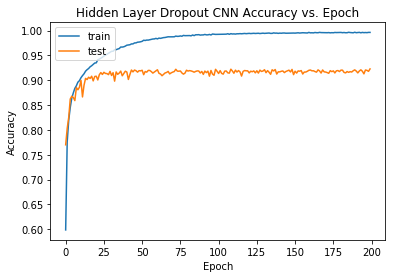

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_hidden_mdata.history['acc'])
plt.plot(CNN_dropout_hidden_mdata.history['val_acc'])
plt.title('Hidden Layer Dropout CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

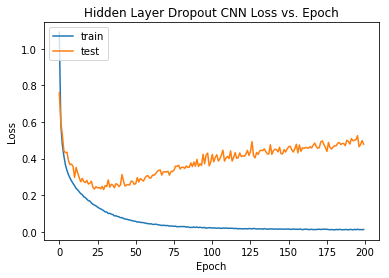

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_hidden_mdata.history['loss'])
plt.plot(CNN_dropout_hidden_mdata.history['val_loss'])
plt.title('Hidden Layer Dropout CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: 0.0128
  
2.   What does the loss of the testing set go to? 

  ANS: 0.4785

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Dropout in hidden layers is more effective than dropout in input because the core complexity of a network lies in its hidden layers. Dropout in input means we hide some random data from the network, while dropout in the hidden layer means we don't allow the hidden layer weights to see all the data all the time by switching them on and off randomly. The later method is more effective than the former.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The difference in accuracy is 7.35.
  
  This model is not a good fit for the data because we can do better.

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(Dropout(0.3, input_shape=(28,28,1)))
    model.add(Conv2D(256,
                     (3,3),
                     activation ='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                     (3,3),
                     activation ='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation = 'softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss = 'categorical_crossentropy',
                           optimizer = 'RMSprop',
                           metrics =['accuracy'])


#Train the model and assign training meta-data to a variable
CNN_dropout_both_mdata = CNN_dropout_both.fit(data_train, labels_train,
                                                  validation_data = (data_test,labels_test),
                                                  epochs = 100,
                                                  batch_size = 1024,
                                                  shuffle=True)


#Print accuracy of model on testing set after training 
scores = CNN_dropout_both.evaluate(data_test,labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 20s 332us/step - loss: 1.1158 - acc: 0.5850 - val_loss: 0.9365 - val_acc: 0.7390
Epoch 2/100
60000/60000 [==============================] - 19s 321us/step - loss: 0.6226 - acc: 0.7595 - val_loss: 0.7967 - val_acc: 0.7585
Epoch 3/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.5323 - acc: 0.7963 - val_loss: 0.7822 - val_acc: 0.7542
Epoch 4/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.4779 - acc: 0.8167 - val_loss: 0.6019 - val_acc: 0.8229
Epoch 5/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.4381 - acc: 0.8322 - val_loss: 0.5553 - val_acc: 0.8351
Epoch 6/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.4087 - acc: 0.8456 - val_loss: 0.5719 - val_acc: 0.8323
Epoch 7/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.3883 - acc: 0.8524 - val_l

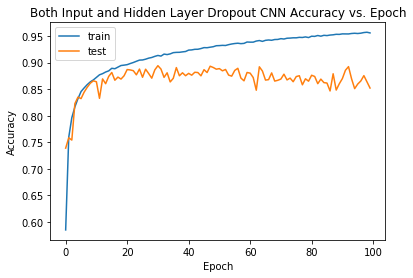

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_mdata.history['acc'])
plt.plot(CNN_dropout_both_mdata.history['val_acc'])
plt.title('Both Input and Hidden Layer Dropout CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

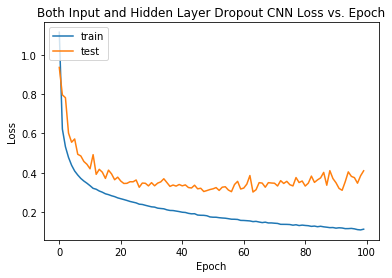

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_mdata.history['loss'])
plt.plot(CNN_dropout_both_mdata.history['val_loss'])
plt.title('Both Input and Hidden Layer Dropout CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 0.1122
  
2.   What does the loss of the testing set go to? 

  ANS: 0.4098
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 10
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: There is not a big difference between the plots.
  Adding dropout to the input layer in addition to dropout in the hidden layer does not significantly increase the robustness of the model.

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [0]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-19 03:23:20--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  11.2MB/s    in 2m 39s  

2019-09-19 03:25:59 (7.48 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [0]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    model.add(Conv2D(256,
                     (1,3),
                     activation ='relu',
                     input_shape=(2,128,1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256,
                     (2,3),
                     activation ='relu'))
    model.add(Conv2D(80,
                     (1,3),
                     activation ='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(80,
                     (1,3),
                     activation ='relu'))
    model.add(Reshape((16,600)))
    model.add(LSTM(50))
    model.add(Dense(128,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation = 'softmax'))
    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics =['accuracy'])


#Train the model and assign training meta-data to a variable
cldnn_mdata = cldnn.fit(X_train, Y_train,
                        validation_data = (X_test,Y_test),
                        epochs = 100,
                        batch_size = 2048,
                        shuffle=True)


#Print accuracy of model on testing set after training 
scores = cldnn.evaluate(X_test,Y_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 170s 394us/step - loss: 1.8304 - acc: 0.2555 - val_loss: 1.4925 - val_acc: 0.3587
Epoch 2/100
432000/432000 [==============================] - 168s 390us/step - loss: 1.2310 - acc: 0.4531 - val_loss: 0.9606 - val_acc: 0.5355
Epoch 3/100
432000/432000 [==============================] - 168s 389us/step - loss: 0.9616 - acc: 0.5551 - val_loss: 0.8119 - val_acc: 0.6304
Epoch 4/100
432000/432000 [==============================] - 168s 389us/step - loss: 0.7832 - acc: 0.6436 - val_loss: 0.7215 - val_acc: 0.6632
Epoch 5/100
432000/432000 [==============================] - 168s 388us/step - loss: 0.6340 - acc: 0.7061 - val_loss: 0.5411 - val_acc: 0.7345
Epoch 6/100
432000/432000 [==============================] - 167s 387us/step - loss: 0.5173 - acc: 0.7527 - val_loss: 0.4116 - val_acc: 0.7889
Epoch 7/100
432000/432000 [==============================] - 167s 387us/step - loss: 0.453

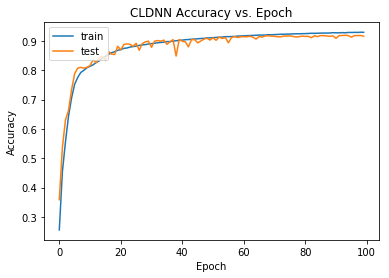

In [0]:
#Plot accuracy vs epoch
plt.plot(cldnn_mdata.history['acc'])
plt.plot(cldnn_mdata.history['val_acc'])
plt.title('CLDNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

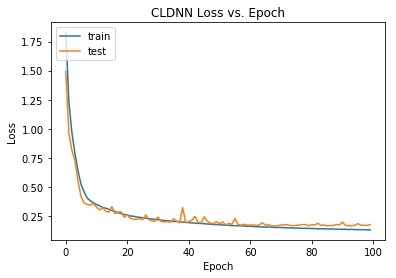

In [0]:
#Plot loss vs epoch
plt.plot(cldnn_mdata.history['loss'])
plt.plot(cldnn_mdata.history['val_loss'])
plt.title('CLDNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Did not have enough time to run the model for 100 epochs. Sorry :( :(
  
  This model does okay. There is lot of room for improvement.

2.   Give two ways to improve the robustness of the model.

  ANS: 
  
  Use recurrent dropout to prevent overfitting of the LSTM layer. 
  
  Add noise to the input data.
  
  Use Stacked layers of LSTM to increase representation power.